## Importando Pacotes e Definindo Configurações

In [119]:
# Importando os Pacotes e Módulos que serão utilizados
import pandas as pd
import numpy as np
import datetime as dt
import nltk
import emoji
import os
from collections import Counter
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt

In [120]:
# Definindo o Estilo dos Gráficos
plt.style.use("seaborn")

___
## Importando e Preparando os Dados

In [121]:
# Importando as bases de dados
files = os.listdir("chat_messages")
datasets = []

for file in files:
    datasets.append(pd.read_csv("./chat_messages/" + file, sep=";"))

In [122]:
# Concatenando as bases em um DataFrame único e colocando seu index como série temporal
data = pd.concat(datasets)

time_serie = pd.to_datetime(data["Date2"] + " " + data["Time"])
data = data.set_index(time_serie)

In [123]:
# Criando Colunas de Tempo
data["Minuto"] = time_serie.dt.minute.values
data["Hora"] = time_serie.dt.hour.values
data["Dia"] = time_serie.dt.day.values
data["Dia da Semana"] = time_serie.apply(lambda x: x.weekday()).values
data["Mês"] = time_serie.dt.month.values
data["Ano"] = time_serie.dt.year.values

# # Ajustando a Coluna UserName e criando a Coluna "Quantidade de Caracteres" com a quantidade de caracteres de cada mensagem
data["UserName"] = data["UserName"].replace({"Hugo Trigueiro": "Eu", "Bárbara Tarazona": "Ela"})
data["Quantidade de Caracteres"] = data["MessageBody"].apply(len)

In [124]:
# Renomenado e Selecionando apenas as colunas necessárias
rename_columns = {"UserName": "Usuário", "MessageBody": "Mensagem", "MediaType": "Tipo de Mídia", "Date2": "Data"}
data = data[["UserName", "MessageBody", "MediaType", "Quantidade de Caracteres", "Minuto", "Hora", "Dia", "Dia da Semana", "Mês", "Ano", "Date2"]].rename(columns=rename_columns)

In [125]:
# Para visualizar a estrutura do DataFrame sem expor as mensagens, foi dropada da visualização a coluna "Mensagem" 
data[data.columns.drop("Mensagem")].head()

,Usuário,Tipo de Mídia,Quantidade de Caracteres,Minuto,Hora,Dia,Dia da Semana,Mês,Ano,Data
2017-06-30 20:50:04,Eu,NaN,4,50,20,30,4,6,2017,2017-06-30
2017-06-30 20:50:20,Eu,NaN,25,50,20,30,4,6,2017,2017-06-30
2017-06-30 20:51:48,Ela,NaN,12,51,20,30,4,6,2017,2017-06-30
2017-06-30 20:51:58,Ela,NaN,28,51,20,30,4,6,2017,2017-06-30
2017-06-30 20:52:17,Eu,NaN,8,52,20,30,4,6,2017,2017-06-30


___
## Análise Exploratória de Dados

#### Resumo do Período analisado

In [51]:
# Calculando as informações sobre o período analisado
total_time = relativedelta(data.index.max(), data.index.min())
if total_time.years == 1:
    year = str(total_time.years) + " ano"
else:
    year = str(total_time.years) + " anos"
if (total_time.months + 1) == 1:
    month = str(total_time.months + 1) + " mes"
else:
    month = str(total_time.months + 1) + " meses"

dates = {"inicio": "{dia}/{mes}/{ano}".format(**{"dia": data.index.min().day, "mes": data.index.min().month, "ano": data.index.min().year}), 
         "fim": "{dia}/{mes}/{ano}".format(**{"dia": data.index.max().day, "mes": data.index.max().month, "ano": data.index.max().year})}
total_days = (data.index.max() - data.index.min()).days

print("O perído analisado se inicia em {inicio}, termina em {fim}".format(**dates) + " e equivale a cerca de {year} e {month}".format(**{"year": year, "month": month}) + " (total de {} dias).".format(total_days))

O perído analisado se inicia em 30/6/2017, termina em 18/3/2020 e equivale a cerca de 2 anos e 9 meses (total de 992 dias).


In [52]:
# Calculando o percentual de atividade no período
print("Percentual de atividade durante o período: {}%".format(str(round(data["Data"].unique().size/total_days * 100, 2))))

Percentual de atividade durante o período: 98.79%


In [126]:
# Calculando a média diária de mensagens no período
print("Média de mensagens enviadas por dia:", int(round(data_resume_total["Quantidade de Mensagens"].loc["Total"] / total_days)))

Média de mensagens enviadas por dia: 212


#### Número Total de Mensagens e Caracteres Enviados

In [127]:
# Calculando o total de mensagens e caracteres enviados por usuário
data_resume = data[["Mensagem", "Quantidade de Caracteres", "Usuário"]].groupby("Usuário").agg({"Mensagem": "count", "Quantidade de Caracteres": "sum"})

data_resume_total = data_resume.append(data_resume.sum().rename('Total')).rename(columns={"Mensagem": "Quantidade de Mensagens"})
data_resume_total

,Quantidade de Mensagens,Quantidade de Caracteres
Usuário,,
Ela,81645,1881569
Eu,128730,3648842
Total,210375,5530411


#### Resumo:
- O período analisado é de quase **2 anos e 9 meses** do dia 03/06/2017 até 18/03/2020, com um total de **992 dias.**
- Neste período, foram enviadas um total de **210.375 mensagens** que juntas somaram **5.530.411 caracteres.**
- O Percentual de atividade durante o período: 98.79%
- Média diária de mensagens: **212 mensagens.**

#### Percentual de Mensagens Enviadas por Usuário

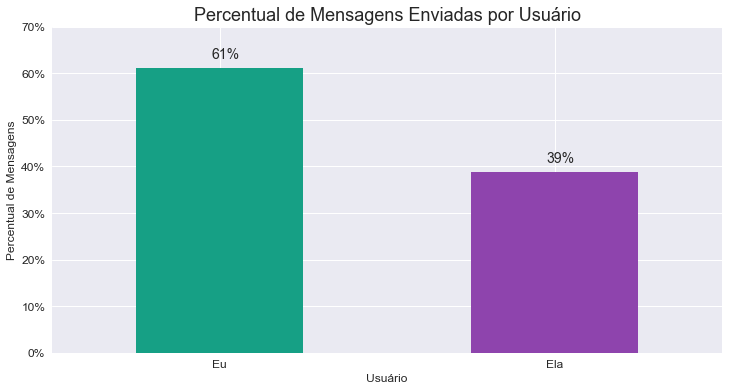

In [128]:
# Plotando o gráfico com o percentual de mensagens enviadas por usuário
ax = data["Usuário"].value_counts(1)
vals = ax.plot.bar(rot=0, figsize=(12, 6), color=["#16a085", "#8e44ad"]).get_yticks()
ax.plot.bar(rot=0, figsize=(12, 6), color=["#16a085", "#8e44ad"]).set_yticklabels(["{:,.0%}".format(x) for x in vals])

plt.title("Percentual de Mensagens Enviadas por Usuário", fontsize=18)
plt.ylabel("Percentual de Mensagens", fontsize=12)
plt.xlabel("Usuário", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
[plt.text(index - 0.025, value + 0.02, str(int(round((value * 100)))) + "%", fontsize=14) for index, value in enumerate(ax.values)]
plt.ylim(0, 0.7)
plt.show()

#### Número Total de Mídias Enviadas Segmentadas por seu Tipo e por Usuário

In [129]:
# Calculando a quantidade de mídias enviadas segmentadas por tipo e por usuário
media_resume = pd.DataFrame(data.groupby(["Usuário", "Tipo de Mídia"])["Tipo de Mídia"].count()).unstack()["Tipo de Mídia"]

media_resume_total = media_resume.append(media_resume.sum().rename('Total'))
media_resume_total["Total"] = media_resume_total.sum(axis=1)

media_resume_total

Tipo de Mídia,GIF,document,forwarded audio,image,recorded audio,video,Total
Usuário,,,,,,,
Ela,243,1,5,2219,114,56,2638
Eu,283,9,19,3456,75,44,3886
Total,526,10,24,5675,189,100,6524


#### Volume de Total Mensagens Enviadas por Dia durante o Período

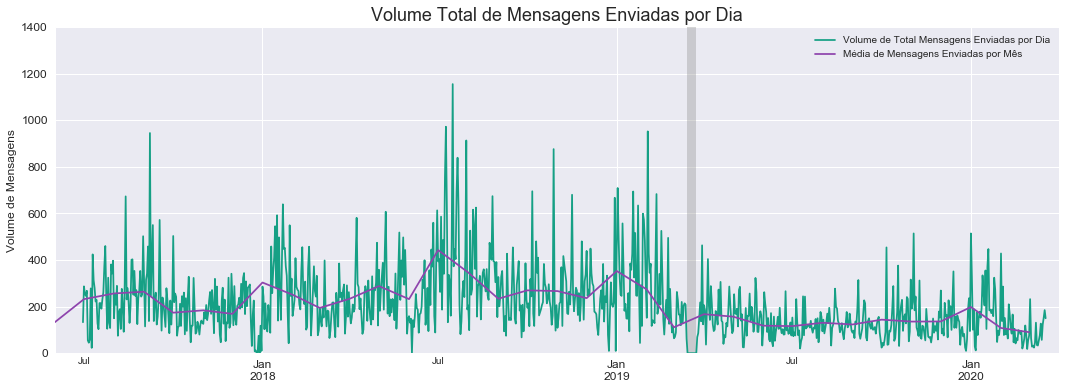

In [57]:
# Plotando o gráfico com o volume total de mensagens enviadas por dia ao longo de todo o período
fig, ax = plt.subplots(1, 1)
data["Mensagem"].resample("D").count().plot.line(ax=ax, figsize=(18, 6), color="#16a085")
data["Mensagem"].resample("D").count().resample("M").mean().plot.line(figsize=(18, 6), color="#8e44ad")

plt.legend(["Volume de Total Mensagens Enviadas por Dia", "Média de Mensagens Enviadas por Mês"])
plt.title("Volume Total de Mensagens Enviadas por Dia", fontsize=18)
plt.axvspan("2019-03-14", "2019-03-24", facecolor='0.6', alpha=0.4)
plt.ylabel("Volume de Mensagens", fontsize=12)
plt.xlim("2017-06-01", "2020-04-01")
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 1400)
plt.show()

#### Média de Mensagens Enviadas por Mês

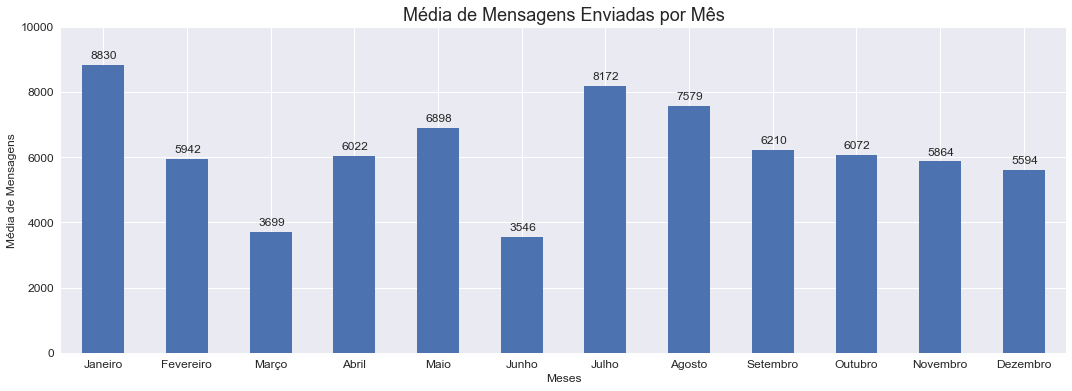

In [130]:
# Plotando o gráfico com a média de mensagens enviadas por mês
data["Data-M"] = data["Data"].str.slice(0, 7)
replace_months = {1: "Janeiro", 2: "Fevereiro", 3: "Março", 4: "Abril", 5: "Maio", 6: "Junho", 7: "Julho", 8: "Agosto", 9: "Setembro", 10: "Outubro", 11: "Novembro", 12: "Dezembro"}
ax = data[["Data-M", "Mês", "Mensagem"]].groupby(["Mês", "Data-M"]).count().groupby("Mês").mean().reset_index().replace(replace_months).set_index("Mês")
ax.plot.bar(rot=0, figsize=(18, 6), legend=False)

plt.title("Média de Mensagens Enviadas por Mês", fontsize=18)
plt.ylabel("Média de Mensagens", fontsize=12)
plt.xlabel("Meses", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
[plt.text(index - 0.15, int(value) + 200, str(int(value)), fontsize=12) for index, value in enumerate(ax["Mensagem"])]
plt.ylim(0, 10000)
plt.show()

#### Média de Mensagens Enviadas por Dia da Semana

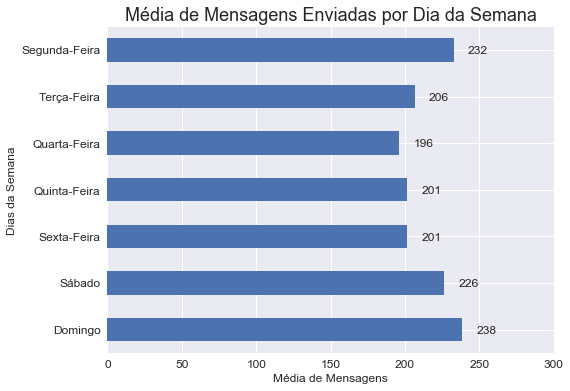

In [59]:
# Plotando o gráfico com a média de mensagens enviadas por dia da semana
replace_weekdays = {0: "Segunda-Feira", 1: "Terça-Feira", 2: "Quarta-Feira", 3: "Quinta-Feira", 4: "Sexta-Feira", 5: "Sábado", 6: "Domingo"}
ax = data[["Data", "Dia da Semana", "Mensagem"]].groupby(["Dia da Semana", "Data"]).count().groupby("Dia da Semana").mean().sort_values("Dia da Semana", ascending=False).reset_index().replace(replace_weekdays).set_index("Dia da Semana")
ax.plot.barh(figsize=(8, 6), legend=False)

plt.xlim(0, 300)
plt.title("Média de Mensagens Enviadas por Dia da Semana", fontsize=18)
plt.xlabel("Média de Mensagens", fontsize=12)
plt.ylabel("Dias da Semana", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
[plt.text(int(value) + 10, index - 0.08, str(int(value)), fontsize=12) for index, value in enumerate(ax["Mensagem"])]
plt.show()

#### Percentual Médio de Mensagens Enviadas por Minuto em um Dia

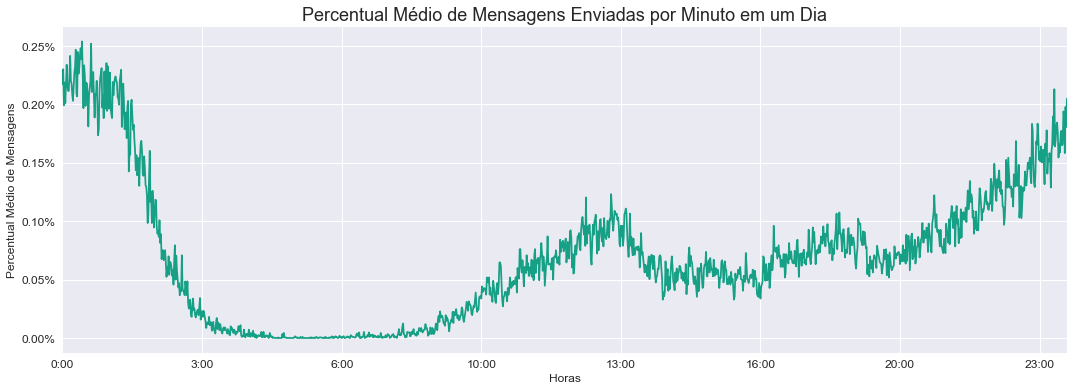

In [131]:
# Plotando o gráfico com o percentual médio de mensagens enviadas por minuto em um dia
count_min = data[["Minuto", "Hora", "Mensagem"]].resample("1min").agg({"Mensagem": "count"})
ax1 = ((pd.concat([count_min, pd.DataFrame({"Minuto": count_min.index.minute, "Hora": count_min.index.hour}, index=count_min.index)], axis=1).groupby(["Hora", "Minuto"]).mean()/212)).plot.line(figsize=(18, 6), color="#16a085", legend=False)
x_vals = ax1.get_xticks()
y_vals = ax1.get_yticks()

ax1.set_xticklabels([str(int(round(x/60, 2))) + ":00" for x in x_vals])
ax1.set_yticklabels(["{:,.2%}".format(x) for x in y_vals])
plt.title("Percentual Médio de Mensagens Enviadas por Minuto em um Dia", fontsize=18)
plt.ylabel("Percentual Médio de Mensagens", fontsize=12)
plt.xlabel("Horas", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

___
## Análise das Palavras e Expressões

In [61]:
# Separando as mensagens em textos únicos divididos em: todo o texto, textos meus e textos dela
full_text = data["Mensagem"].str.cat(sep=" ")
me_text = data[data["Usuário"] == "Eu"]["Mensagem"].str.cat(sep=" ")
her_text = data[data["Usuário"] == "Ela"]["Mensagem"].str.cat(sep=" ")

In [62]:
# Fazendo o donwload da lista de Stopwords e ajuste manual de algumas Stopwords abreviadas
nltk.download("stopwords")
stopwords = nltk.corpus.stopwords.words('portuguese')
extra_stopwords = ["vc", "pra", "pro", "nao", "tbm", "ta", "vai", "vou", "to", "bem", "q", "n", "eh", "ae", "mto", "mt", "msm"]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hugo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
# A função criada abaixo extrai uma lista com todos os emojis únicos enviados nas mensagens e uma string com todos os emojis enviados para que seja contada a sua frequência de envio, a partir da entrada de uma string.
def extract_emojis(str):
    list_emojis = ' '.join(c for c in str if c in emoji.UNICODE_EMOJI).split(" ")
    final_list_emojis = list(pd.Series(list_emojis).unique())
    full_emojis = pd.Series(list_emojis).str.cat(sep="")
    return {"Lista de Emojis": final_list_emojis, "Todos os Emojis Usados": full_emojis}

emojis = extract_emojis(full_text)

In [64]:
# Separando em duas variáveis uma série com todas as palavras enviadas por cada um
me_words = pd.Series(me_text.split(" ")).apply(lambda x: x.lower())
her_words = pd.Series(her_text.split(" ")).apply(lambda x: x.lower())

In [65]:
# Separando em duas variáveis a série com as palavras enviadas por cada um e suas respectivas frequências
me_words_freq = me_words[~me_words.isin(stopwords + extra_stopwords + emojis["Lista de Emojis"])].value_counts().reset_index().rename(columns={"index": "Palavras mais frequentes (Eu)", 0: "Frequência"})
her_words_freq = her_words[~her_words.isin(stopwords + extra_stopwords + emojis["Lista de Emojis"])].value_counts().reset_index().rename(columns={"index": "Palavras mais frequentes (Ela)", 0: "Frequência"})

In [74]:
# Criando um dataFrame com as top 10 palavras enviadas por cada um
top_ten_words = pd.concat([me_words_freq.head(10), her_words_freq.head(10)], axis=1).set_index(pd.Series(range(1,11)))
top_ten_words

,Palavras mais frequentes (Eu),Frequência,Palavras mais frequentes (Ela),Frequência
1,sim,2884,sim,2749
2,pq,2300,amor,1966
3,bom,2243,bom,1731
4,agr,2054,mor,1528
5,mor,2038,dia,1272
6,dia,2025,quero,1218
7,gente,1809,sei,1212
8,fazer,1729,agnt,1173
9,sei,1654,fazer,1080
10,ser,1638,queria,1017


___
## Análise dos Emojis

In [67]:
# Separando em duas variáveis a série com os emojis enviados por cada um e suas respectivas frequências
me_emojis_freq = pd.DataFrame(dict(Counter(extract_emojis(me_text)["Todos os Emojis Usados"]).most_common(), index=["Frequencia"])).T.reset_index().rename(columns={"index": "Emoji (Eu)", 0: "Frequência"})
her_emojis_freq = pd.DataFrame(dict(Counter(extract_emojis(her_text)["Todos os Emojis Usados"]).most_common(), index=["Frequencia"])).T.reset_index().rename(columns={"index": "Emoji (Ela)", 0: "Frequência"})

In [69]:
# Emojis com mãos e cores de pele diferente do dourado, são agrupados e renderizados como um quadrado na cor da pele, não podendo ser contados.
# Portanto, serão removidos da série com as frequências dos emojis

me_skin_emojis_index = me_emojis_freq.loc[me_emojis_freq["Emoji (Eu)"] == "🏼"].index
me_emojis_freq = me_emojis_freq.drop(me_skin_emojis_index).reset_index(drop=True)

her_skin_emojis_index = her_emojis_freq.loc[her_emojis_freq["Emoji (Ela)"] == "🏻"].index
her_emojis_freq = her_emojis_freq.drop(her_skin_emojis_index).reset_index(drop=True)

In [73]:
# Criando um dataFrame com os top 10 emojis enviados por cada um
top_ten_emojis = pd.concat([me_emojis_freq.head(10), her_emojis_freq.head(10)], axis=1).set_index(pd.Series(range(1, 11)))
top_ten_emojis

,Emoji (Eu),Frequência,Emoji (Ela),Frequência
1,❤,10659,❤,10116
2,💕,4105,💕,3660
3,😔,1947,😘,1364
4,😭,867,😍,1262
5,😘,860,😋,834
6,😍,662,😔,833
7,🤤,657,🤤,500
8,👀,574,🥰,493
9,🙈,493,🙈,405
10,😢,450,🙄,372
